In [5]:
def bfs(graph,start,goal,heuristic, path=[]):
    open_list = [(0,start)]
    closed_list = set()
    closed_list.add(start)

    while open_list:
        open_list.sort(key = lambda x: heuristic[x[1]], reverse=True)
        cost, node = open_list.pop()
        path.append(node)

        if node==goal:
            return cost, path

        closed_list.add(node)
        for neighbour, neighbour_cost in graph[node]:
            if neighbour not in closed_list:
                closed_list.add(node)
                open_list.append((cost+neighbour_cost, neighbour))

    return None


graph = {
    'A': [('B', 11), ('C', 14), ('D',7)],
    'B': [('A', 11), ('E', 15)],
    'C': [('A', 14), ('E', 8), ('D',18), ('F',10)],
    'D': [('A', 7), ('F', 25), ('C',18)],
    'E': [('B', 15), ('C', 8), ('H',9)],
    'F': [('G', 20), ('C', 10), ('D',25)],
    'G': [],
    'H': [('E',9), ('G',10)]
}

start = 'A'
goal = 'G'

heuristic = {
    'A': 40,
    'B': 32,
    'C': 25,
    'D': 35,
    'E': 19,
    'F': 17,
    'G': 0,
    'H': 10
}

result = bfs(graph, start, goal, heuristic)

if result:
    print(f"Minimum cost path from {start} to {goal} is {result[1]}")
    print(f"Cost: {result[0]}")
else:
    print(f"No path from {start} to {goal}")

Minimum cost path from A to G is ['A', 'C', 'F', 'G']
Cost: 44


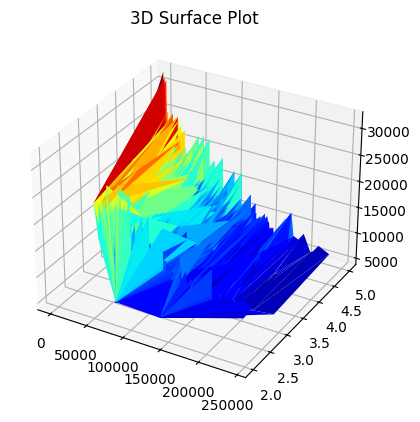

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./ToyotaCorolla.csv')
x = df['KM']
y = df['Doors']
z = df['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")

plt.show()

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


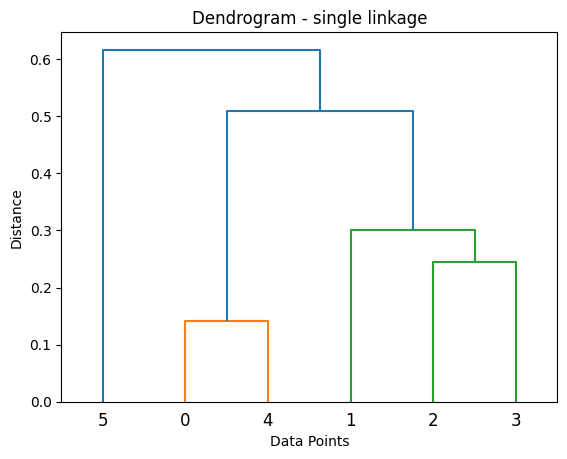

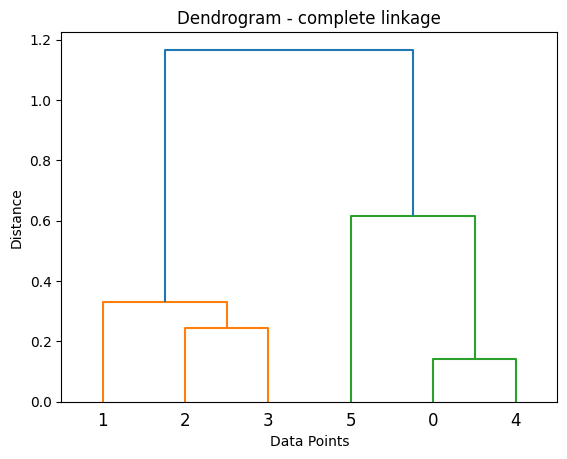

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:6]

def proximity_matrix(data):
  n = data.shape[0]
  proximity_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i+1, n):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
        proximity_matrix[j, i] = proximity_matrix[i, j]
  return proximity_matrix

def plot_dendrogram(data, method):
  linkage_matrix = linkage(data, method=method)
  dendrogram(linkage_matrix)
  plt.title(f'Dendrogram - {method} linkage')
  plt.xlabel('Data Points')
  plt.ylabel('Distance')
  plt.show()

# Calculate the proximity matrix
print("Proximity matrix:")
print(proximity_matrix(data))

# Plot the dendrogram using single-linkage
plot_dendrogram(data, 'single')

# Plot the dendrogram using complete-linkage
plot_dendrogram(data, 'complete')

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


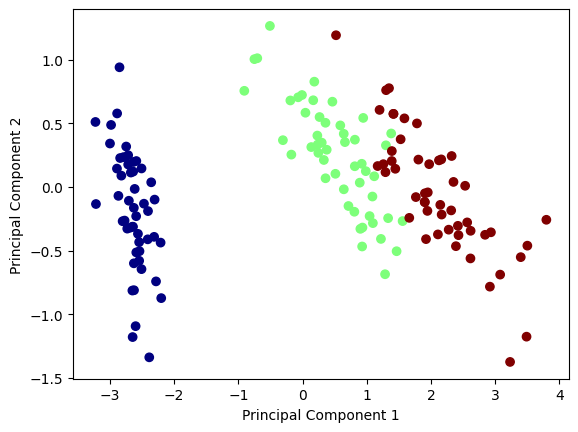

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


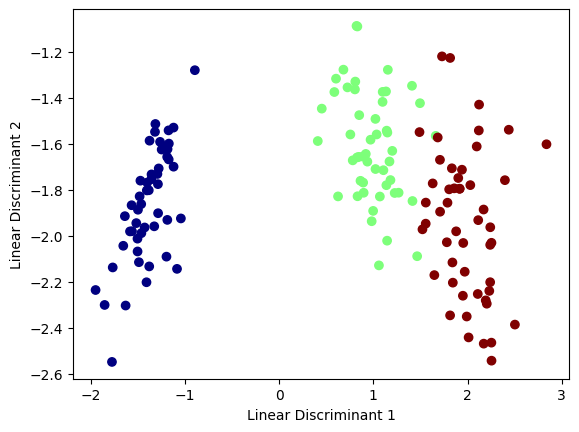

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dfs import load_iris

class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    # Mean center the data
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    #Calculate covariance matrix
    cov = np.cov(X.T)

    #Calculate eigenvalues and eigen vectors
    eigenvalues, eigenvectors, = np.linalg.eig(cov)

    # Sort the vectors in decreasing order of eigenvalues
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    # Take required number of components
    self.components = eigenvectors[:self.n_components]


  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)


X = load_iris().data
y = load_iris().target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()


class LDA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.linear_discriminants = None

  def fit(self, X, y):
    n_features = X.shape[1]
    class_labels = np.unique(y)

    # Calculate SB and SW
    mean_overall = np.mean(X, axis=0)
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))

    for c in class_labels:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0)
      SW += (X_c - mean_c).T.dot((X_c - mean_c))

      n_c = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
      SB += n_c * (mean_diff).dot(mean_diff.T)

    # Determine SW^-1 * SB
    A = np.linalg.inv(SW).dot(SB)

    #Calculate eigenvalues and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Sort the vectors in decreasing order of eigenvalues
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    # Take required number of components
    self.linear_discriminants = eigenvectors[:self.n_components]

  def transform(self, X):
    return np.dot(X, self.linear_discriminants.T)


X = load_iris().data
Y = load_iris().target

lda = LDA(2)
lda.fit(X, Y)
X_projected = lda.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=Y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")

plt.show()

In [7]:
def h(n):
    H = {'A': 3, 'B': 4, 'C': 2, 'D': 6, 'G': 0, 'S': 5}
    return H[n]

def a_star_algorithm(graph, start, goal):

    open_list = [start]
    closed_list = set()

    g = {start:0}

    parents = {start:start}

    while open_list:

        open_list.sort(key=lambda v: g[v] + h(v), reverse=True)
        n = open_list.pop()

        # If node is goal then construct the path and return
        if n == goal:
            reconst_path = []

            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(start)
            reconst_path.reverse()

            print(f'Path found: {reconst_path}')
            return reconst_path

        for (m, weight) in graph[n]:
        # if m is first visited, add it to open_list and note its parent
            if m not in open_list and m not in closed_list:
                open_list.append(m)
                parents[m] = n
                g[m] = g[n] + weight

            # otherwise, check if it's quicker to first visit n, then m
            # and if it is, update parent and g data
            # and if the node was in the closed_list, move it to open_list
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.append(m)

        # Node's neighbours are visited. Now put node to closed list.
        closed_list.add(n)

    print('Path does not exist!')
    return None


graph = {
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2), ('C', 1)],
    'B': [('D', 5)],
    'C': [('D', 3),('G', 4)],
    'D': [('G', 2)]
}

a_star_algorithm(graph, 'S', 'G')

Path found: ['S', 'A', 'C', 'G']


['S', 'A', 'C', 'G']

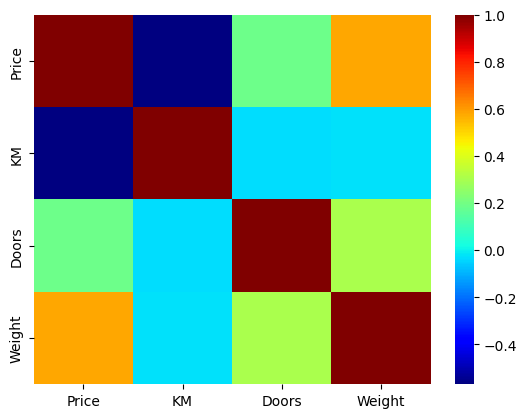

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("./ToyotaCorolla.csv")

sns.heatmap(data[["Price","KM","Doors", "Weight"]].corr(),cmap='jet')
plt.show()

In [9]:
class TreeNode:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

def minimax(node, depth, maximizing_player):
    if depth == 0 or not node.children:
        return node.value, [node.value]

    if maximizing_player:
        max_value = float("-inf")
        max_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, False)
            if child_value > max_value:
                max_value = child_value
                max_path = [node.value] + child_path
        return max_value, max_path
    else:
        min_value = float("inf")
        min_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, True)
            if child_value < min_value:
                min_value = child_value
                min_path = [node.value] + child_path
        return min_value, min_path


game_tree = TreeNode(0, [
    TreeNode(1, [TreeNode(3),TreeNode(12)]),
    TreeNode(4, [TreeNode(8),TreeNode(2)])
])


optimal_value, optimal_path = minimax(game_tree, 2, True)

print("Optimal value:", optimal_value)
print("Optimal path:", optimal_path)

Optimal value: 3
Optimal path: [0, 1, 3]


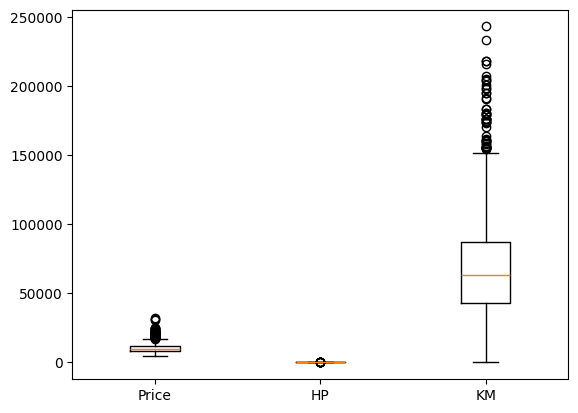

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('./ToyotaCorolla.csv')

plt.boxplot([data["Price"],data["HP"],data["KM"]])

plt.xticks([1,2,3],["Price","HP","KM"])

plt.show()

In [11]:
MAX, MIN = 1000, -1000

def alphabeta_minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):

	if depth == 3:
		return values[nodeIndex]

	if maximizingPlayer:
		best = MIN
		for i in range(0, 2):
			val = alphabeta_minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
			best = max(best, val)
			alpha = max(alpha, best)

			if beta <= alpha:
				break
		return best

	else:
		best = MAX
		for i in range(0, 2):
			val = alphabeta_minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
			best = min(best, val)
			beta = min(beta, best)

			if beta <= alpha:
				break

		return best


values = [3, 5, 6, 9, 1, 2, 0, -1]
print("The optimal value is :", alphabeta_minimax(0, 0, True, values, MIN, MAX))

The optimal value is : 5


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

class NaiveBayesClassifier:
  def __init__(self):
    self.prior = {}
    self.conditional = {}

  def fit(self, X, y):
    self.classes = np.unique(y)
    for c in self.classes:
      self.prior[c] = np.mean(y == c)

    for feature in X.columns:
      self.conditional[feature] = {}
      for c in self.classes:
        feature_values = X[feature][y == c]
        self.conditional[feature][c] = { 'mean': np.mean(feature_values),'std': np.std(feature_values) }

  def predict(self, X):
    y_pred = []
    for _, sample in X.iterrows():
      probabilities = {}
      for c in self.classes:
        probabilities[c] = self.prior[c]
        for feature in X.columns:
          mean = self.conditional[feature][c]['mean']
          std = self.conditional[feature][c]['std']
          x = sample[feature]
          probabilities[c] *= self._gaussian_pdf(x, mean, std)
      y_pred.append(max(probabilities, key=probabilities.get))
    return y_pred

  def _gaussian_pdf(self, x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train, test = train_test_split(df, test_size=0.2)

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

In [15]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

df = pd.read_csv('glass.csv')
y = df['Type'].values
X = df.drop('Type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

[1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 7, 1, 3, 5, 1, 2, 7, 1, 3, 1, 5, 7, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 6, 2, 7, 7, 5, 7, 6, 1, 2, 2, 7, 7, 2, 1, 2, 1, 1, 1, 7, 7, 1, 7, 7, 5, 6, 3, 1, 2, 2]
Accuracy: 0.6615384615384615


In [16]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

def manhattan_distance(x1, x2):
  distance = np.sum(np.abs(x1 - x2))
  return distance

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

df = pd.read_csv('fruits.csv')
y = df['fruit_label'].values
X = df[['mass','width','height','color_score']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Predictions:",predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

Predictions: [2, 3, 4, 3, 3, 4, 1, 3, 3, 3, 4, 1]
Accuracy: 0.6666666666666666


Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


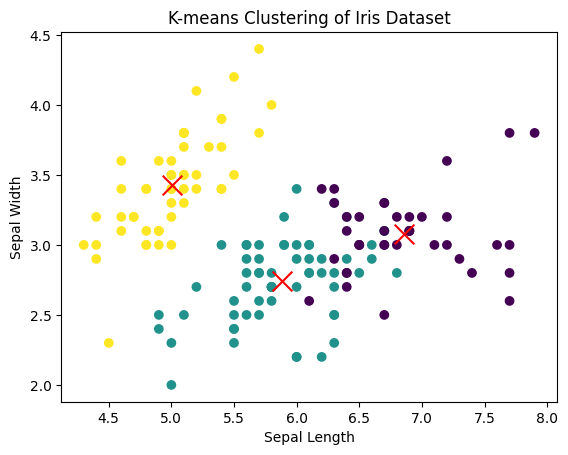

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def kmeans(X, K, max_iters=100):
  centroids = X[:K]

  for _ in range(max_iters):
    # Assign each data point to the nearest centroid

    expanded_x = X[:, np.newaxis]
    euc_dist = np.linalg.norm(expanded_x - centroids, axis=2)
    labels = np.argmin(euc_dist, axis=1)

    # Update the centroids based on the assigned point
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

    # If the centroids did not change, stop iterating
    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  return labels, centroids


X = load_iris() .data
K=3
labels, centroids = kmeans(X, K)
print("Labels:", labels)
print("Centroids:", centroids)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


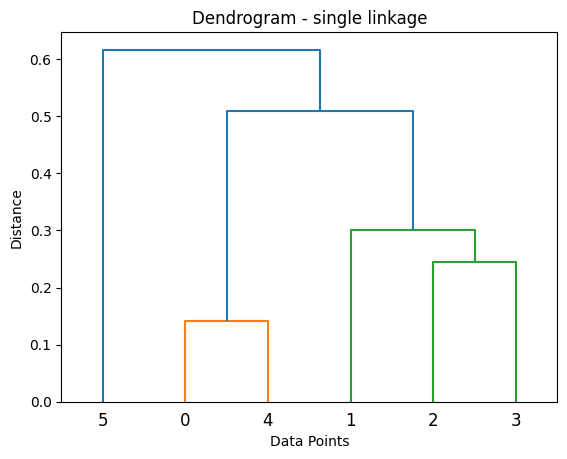

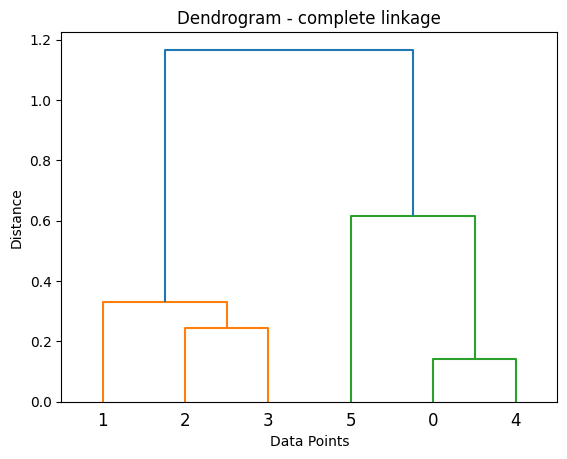

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:6]

def proximity_matrix(data):
  n = data.shape[0]
  proximity_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i+1, n):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
        proximity_matrix[j, i] = proximity_matrix[i, j]
  return proximity_matrix

def plot_dendrogram(data, method):
  linkage_matrix = linkage(data, method=method)
  dendrogram(linkage_matrix)
  plt.title(f'Dendrogram - {method} linkage')
  plt.xlabel('Data Points')
  plt.ylabel('Distance')
  plt.show()

# Calculate the proximity matrix
print("Proximity matrix:")
print(proximity_matrix(data))

# Plot the dendrogram using single-linkage
plot_dendrogram(data, 'single')

# Plot the dendrogram using complete-linkage
plot_dendrogram(data, 'complete')

In [1]:
# Without using keras

import numpy as np

# Activation function (sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the training data for AND-NOT function
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([[0], [0], [1], [0]])

# Define the training data for XOR function
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Define the Multi-layer Perceptron class with one hidden layer
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input to hidden layer
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        
        # Initialize weights for hidden to output layer
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        
        # Initialize biases for hidden layer
        self.bias_hidden = np.random.rand(1, hidden_size)
        
        # Initialize biases for output layer
        self.bias_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        
        # Forward pass through the output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        # Calculate the error for the output layer
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Training the MLP for AND-NOT function
mlp_and_not = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_and_not.train(X_and_not, y_and_not, epochs=5000)

# Training the MLP for XOR function
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_xor.train(X_xor, y_xor, epochs=5000)

# Print training results
print("AND-NOT Function Predictions:")
print(mlp_and_not.predict(X_and_not))

print("\nXOR Function Predictions:")
print(mlp_xor.predict(X_xor))

# Manually test specific input values
and_not_test_input = np.array([[0, 1]])
xor_test_input = np.array([[1, 0]])

print("\nAND-NOT Function Prediction for input [0, 1]:")
print(mlp_and_not.predict(and_not_test_input))

print("\nXOR Function Prediction for input [1, 0]:")
print(mlp_xor.predict(xor_test_input))

AND-NOT Function Predictions:
[[0]
 [0]
 [1]
 [0]]

XOR Function Predictions:
[[0]
 [1]
 [1]
 [0]]

AND-NOT Function Prediction for input [0, 1]:
[[0]]

XOR Function Prediction for input [1, 0]:
[[1]]


In [3]:
# Without using keras

import numpy as np

# Activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the training data for the AND function
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Define the training data for the OR function
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0], [1], [1], [1]])

# Define the Single-layer Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        # Initialize weights to zero
        self.weights = np.zeros((input_size, 1))
        # Initialize bias to zero
        self.bias = 0
        # Set the learning rate and the number of training epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        # Training process
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                # Reshape inputs to column vector
                inputs = inputs.reshape(-1, 1)
                # Calculate linear output
                linear_output = np.dot(inputs.T, self.weights) + self.bias
                # Apply step function to get the prediction
                prediction = step_function(linear_output)
                # Calculate the error
                error = label - prediction
                # Update weights and bias based on the error
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        # Prediction process
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

# Training the Perceptron for AND function
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X_and, y_and)

# Training the Perceptron for OR function
perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X_or, y_or)

# Print training results for the AND function
print("AND Function Predictions:")
print(perceptron_and.predict(X_and))

# Print training results for the OR function
print("\nOR Function Predictions:")
print(perceptron_or.predict(X_or))

# Manually test specific input values for the AND function
and_test_input = np.array([[1, 1]])
print("\nAND Function Prediction for input [1, 1]:")
print(perceptron_and.predict(and_test_input))

# Manually test specific input values for the OR function
or_test_input = np.array([[0, 1]])
print("\nOR Function Prediction for input [0, 1]:")
print(perceptron_or.predict(or_test_input))

AND Function Predictions:
[[0]
 [0]
 [0]
 [1]]

OR Function Predictions:
[[0]
 [1]
 [1]
 [1]]

AND Function Prediction for input [1, 1]:
[[1]]

OR Function Prediction for input [0, 1]:
[[1]]


Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


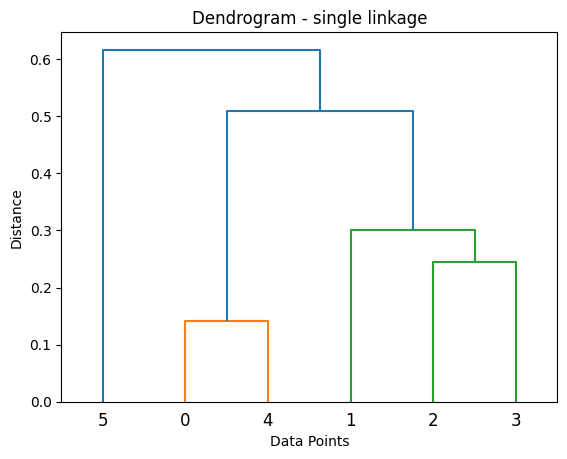

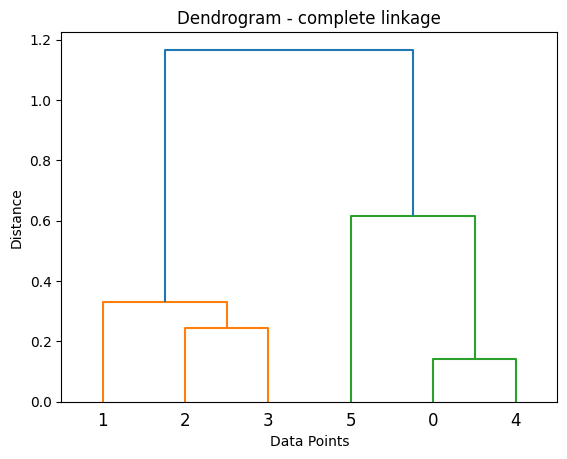

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:6]

def proximity_matrix(data):
  n = data.shape[0]
  proximity_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i+1, n):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
        proximity_matrix[j, i] = proximity_matrix[i, j]
  return proximity_matrix

def plot_dendrogram(data, method):
  linkage_matrix = linkage(data, method=method)
  dendrogram(linkage_matrix)
  plt.title(f'Dendrogram - {method} linkage')
  plt.xlabel('Data Points')
  plt.ylabel('Distance')
  plt.show()

# Calculate the proximity matrix
print("Proximity matrix:")
print(proximity_matrix(data))

# Plot the dendrogram using single-linkage
plot_dendrogram(data, 'single')

# Plot the dendrogram using complete-linkage
plot_dendrogram(data, 'complete')

Scikit-learn K-means Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Scikit-learn K-means Centroids: [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


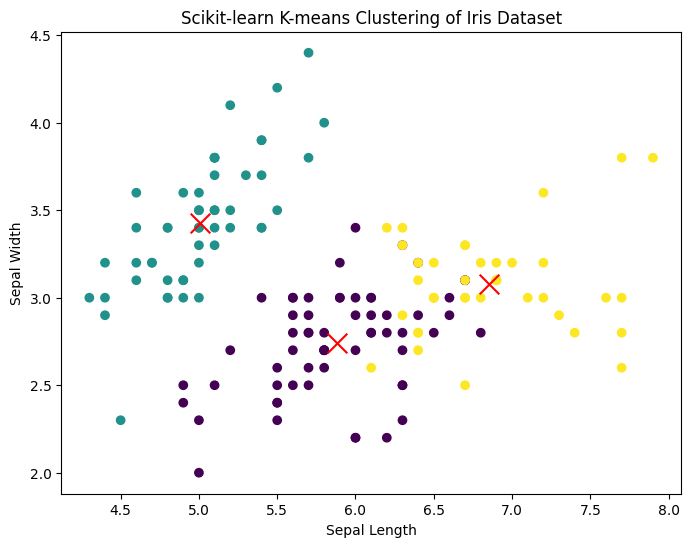

In [5]:
#using sklearn


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
X = load_iris().data

# K-means using scikit-learn
K = 3
kmeans_sklearn = KMeans(n_clusters=K, random_state=0)
labels_sklearn = kmeans_sklearn.fit_predict(X)
centroids_sklearn = kmeans_sklearn.cluster_centers_

print("Scikit-learn K-means Labels:", labels_sklearn)
print("Scikit-learn K-means Centroids:", centroids_sklearn)

# Plotting K-means results using sklearn
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scikit-learn K-means Clustering of Iris Dataset')
plt.show()

In [9]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

def manhattan_distance(x1, x2):
  distance = np.sum(np.abs(x1 - x2))
  return distance

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

df = pd.read_csv('fruits.csv')
y = df['fruit_label'].values
X = df[['mass','width','height','color_score']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Predictions:",predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

Predictions: [2, 3, 4, 3, 3, 4, 1, 3, 3, 3, 4, 1]
Accuracy: 0.6666666666666666


In [10]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

df = pd.read_csv('glass.csv')
y = df['Type'].values
X = df.drop('Type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

[7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 6, 3, 1, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 5, 2, 1, 1, 2, 7, 1, 7, 2, 1, 1, 2, 2, 2, 1, 7, 1, 1, 2, 1, 1, 3, 1, 2, 5, 1, 7, 7, 2, 7, 5, 1, 2, 2, 1, 1, 1, 3]
Accuracy: 0.5846153846153846


In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r"./titanic.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[86 19]
 [37 37]]
Accuracy: 0.6871508379888268


C:\Users\shrey\AppData\Local\Temp\ipykernel_1384\4251591589.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


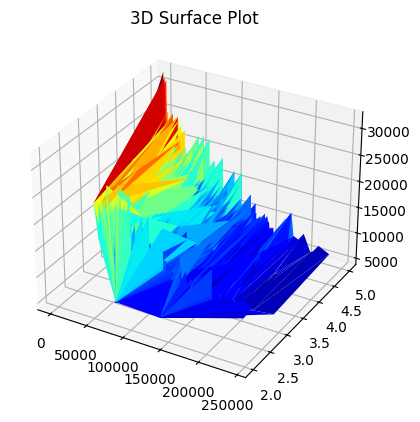

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./ToyotaCorolla.csv')
x = df['KM']
y = df['Doors']
z = df['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")

plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_1384\857999447.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_1384\857999447.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Confusion Matrix:
 [[86 19]
 [37 37]]
Accuracy: 0.6871508379888268


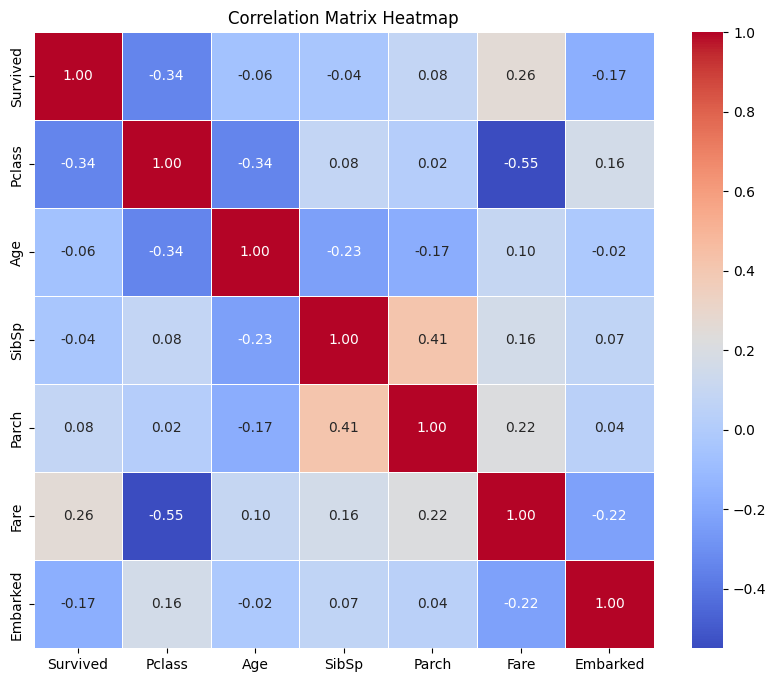

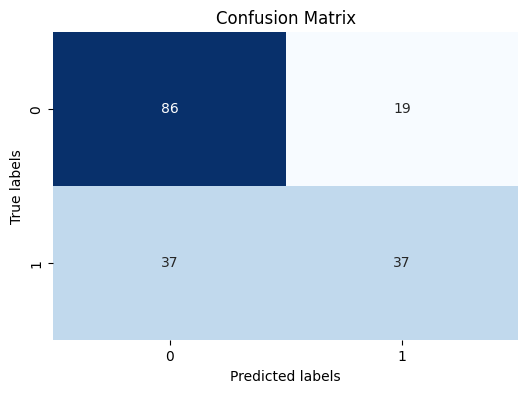

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("titanic.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Number of data points: 14
    Outlook Temperature Humidity   Windy Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


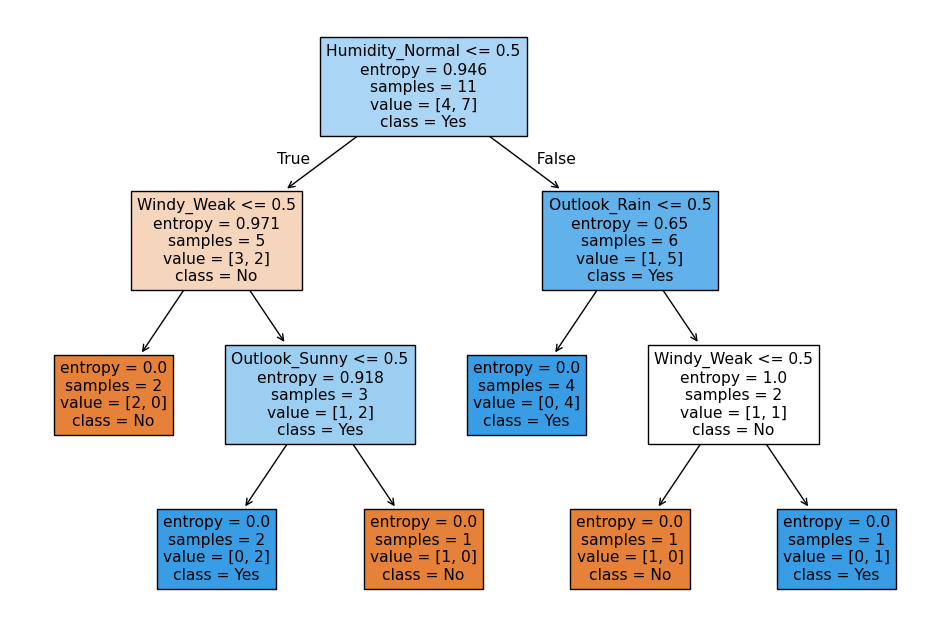

Accuracy:0.6666666666666666
Report
              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data=pd.read_csv("weather_forecast (2).csv")
print(f"Number of data points: {data.shape[0]}")
print(data.head())
data=pd.get_dummies(data,drop_first=True)
x=data.drop("Play_Yes",axis=1)
y=data["Play_Yes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

clf=DecisionTreeClassifier(criterion="entropy",random_state=42)

clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=["No","Yes"])
plt.show()
pred=clf.predict(x_test)
acc=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)
print(f"Accuracy:{acc}")
print(f"Report\n{report}")

In [23]:
MAX, MIN = 1000, -1000

def alphabeta_minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):

	if depth == 3:
		return values[nodeIndex]

	if maximizingPlayer:
		best = MIN
		for i in range(0, 2):
			val = alphabeta_minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
			best = max(best, val)
			alpha = max(alpha, best)

			if beta <= alpha:
				break
		return best

	else:
		best = MAX
		for i in range(0, 2):
			val = alphabeta_minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
			best = min(best, val)
			beta = min(beta, best)

			if beta <= alpha:
				break

		return best


values = [3, 5, 6, 9, 1, 2, 0, -1]
print("The optimal value is :", alphabeta_minimax(0, 0, True, values, MIN, MAX))

The optimal value is : 5


In [24]:
class TreeNode:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

def minimax(node, depth, maximizing_player):
    if depth == 0 or not node.children:
        return node.value, [node.value]

    if maximizing_player:
        max_value = float("-inf")
        max_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, False)
            if child_value > max_value:
                max_value = child_value
                max_path = [node.value] + child_path
        return max_value, max_path
    else:
        min_value = float("inf")
        min_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, True)
            if child_value < min_value:
                min_value = child_value
                min_path = [node.value] + child_path
        return min_value, min_path


game_tree = TreeNode(0, [
    TreeNode(1, [TreeNode(3),TreeNode(12)]),
    TreeNode(4, [TreeNode(8),TreeNode(2)])
])


optimal_value, optimal_path = minimax(game_tree, 2, True)

print("Optimal value:", optimal_value)
print("Optimal path:", optimal_path)

Optimal value: 3
Optimal path: [0, 1, 3]


In [25]:
def best_first_search(graph,start,goal,heuristic, path=[]):
    open_list = [(0,start)]
    closed_list = set()
    closed_list.add(start)

    while open_list:
        open_list.sort(key = lambda x: heuristic[x[1]], reverse=True)
        cost, node = open_list.pop()
        path.append(node)

        if node==goal:
            return cost, path

        closed_list.add(node)
        for neighbour, neighbour_cost in graph[node]:
            if neighbour not in closed_list:
                closed_list.add(node)
                open_list.append((cost+neighbour_cost, neighbour))

    return None


graph = {
    'A': [('B', 11), ('C', 14), ('D',7)],
    'B': [('A', 11), ('E', 15)],
    'C': [('A', 14), ('E', 8), ('D',18), ('F',10)],
    'D': [('A', 7), ('F', 25), ('C',18)],
    'E': [('B', 15), ('C', 8), ('H',9)],
    'F': [('G', 20), ('C', 10), ('D',25)],
    'G': [],
    'H': [('E',9), ('G',10)]
}

start = 'A'
goal = 'G'

heuristic = {
    'A': 40,
    'B': 32,
    'C': 25,
    'D': 35,
    'E': 19,
    'F': 17,
    'G': 0,
    'H': 10
}

result = best_first_search(graph, start, goal, heuristic)

if result:
    print(f"Minimum cost path from {start} to {goal} is {result[1]}")
    print(f"Cost: {result[0]}")
else:
    print(f"No path from {start} to {goal}")

Minimum cost path from A to G is ['A', 'C', 'F', 'G']
Cost: 44


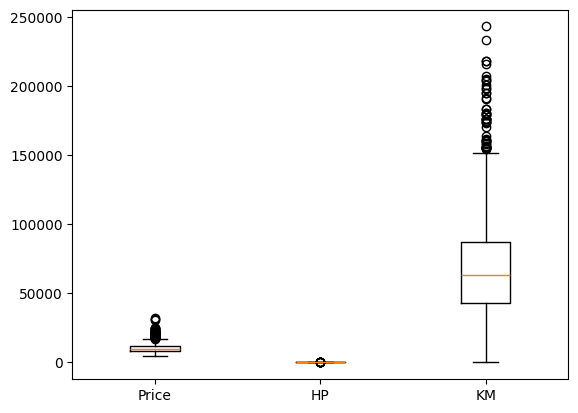

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('./ToyotaCorolla.csv')

plt.boxplot([data["Price"],data["HP"],data["KM"]])

plt.xticks([1,2,3],["Price","HP","KM"])

plt.show()

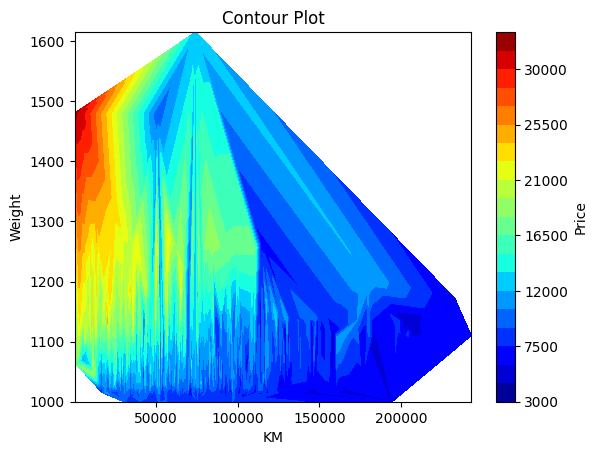

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('./ToyotaCorolla.csv')
x = dataset['KM']
y = dataset['Weight']
z = dataset['Price']

plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('KM')
plt.ylabel('Weight')
plt.title('Contour Plot')
plt.show()
